In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/globalstore-visuals/Global Superstore.xls


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("/kaggle/input/globalstore-visuals/Global Superstore.xls","Orders")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.shape

(51290, 24)

In [6]:
cat_col=[var for var in df.columns if df[var].dtype=="O"]
cat_col

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In [7]:
num_col=[var for var in df.columns if df[var].dtype!="O"]
num_col

['Row ID',
 'Order Date',
 'Ship Date',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

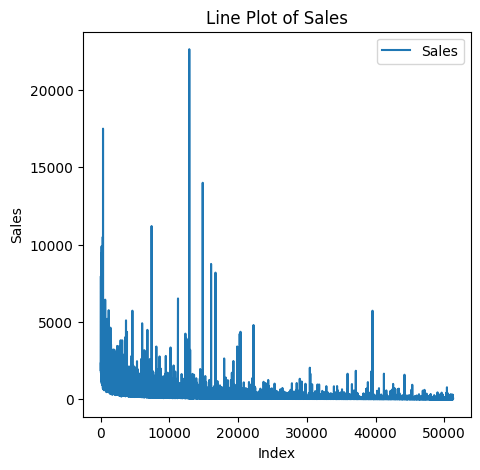

In [8]:
#Line Plot
plt.figure(figsize=(5,5))
plt.plot(df["Sales"],label="Sales")
plt.title("Line Plot of Sales")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show()

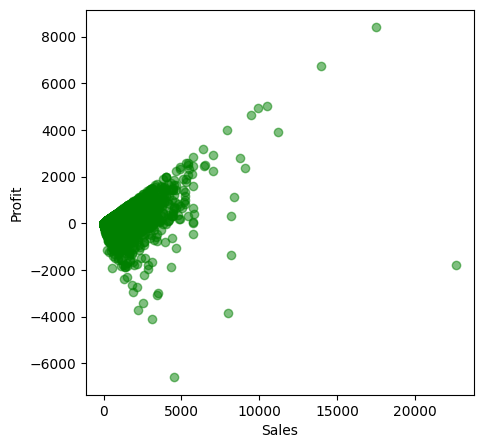

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(df["Sales"],df["Profit"],c="green",alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

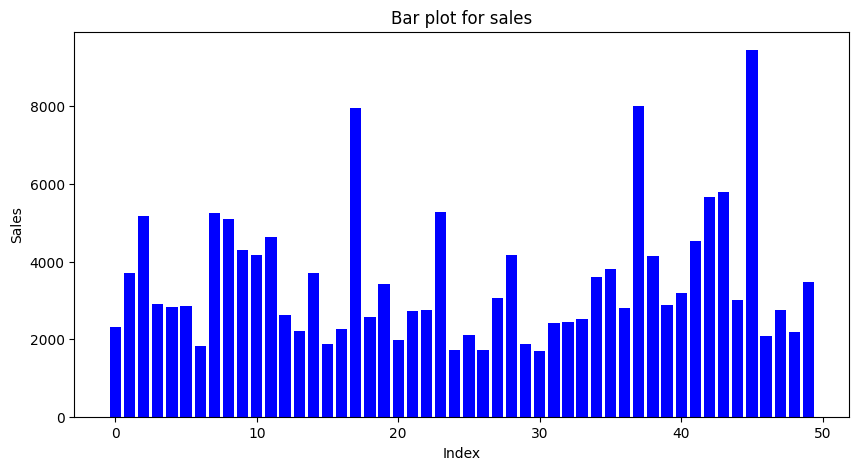

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df.index[:50],df["Sales"][:50],color="blue")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Bar plot for sales")
plt.show()

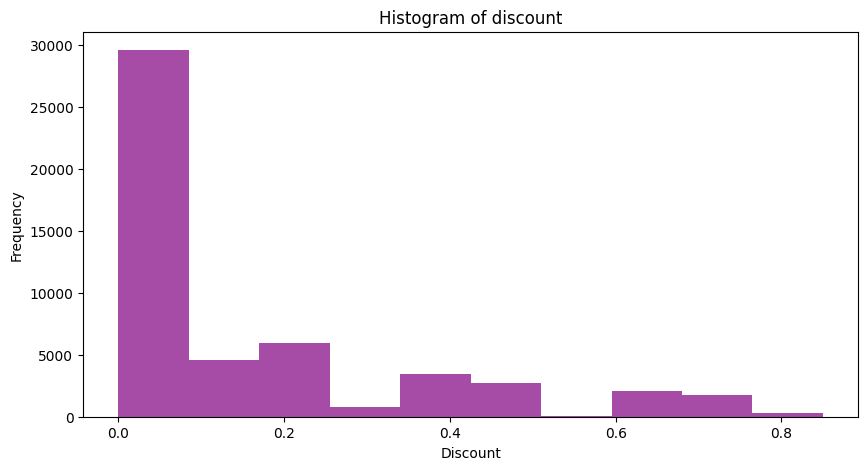

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df["Discount"],bins=10,color="purple",alpha=0.7)
plt.title("Histogram of discount")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()

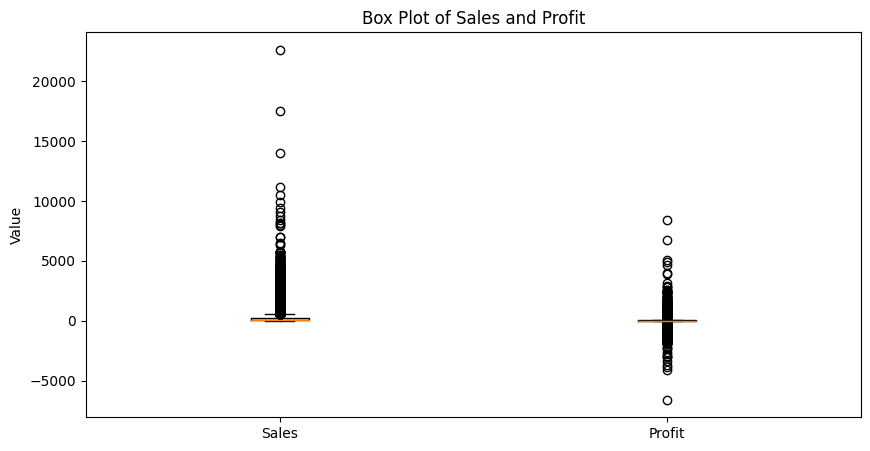

In [12]:
plt.figure(figsize=(10, 5))
plt.boxplot([df['Sales'], df['Profit']], labels=['Sales', 'Profit'])
plt.title('Box Plot of Sales and Profit')
plt.ylabel('Value')
plt.show()

<Axes: >

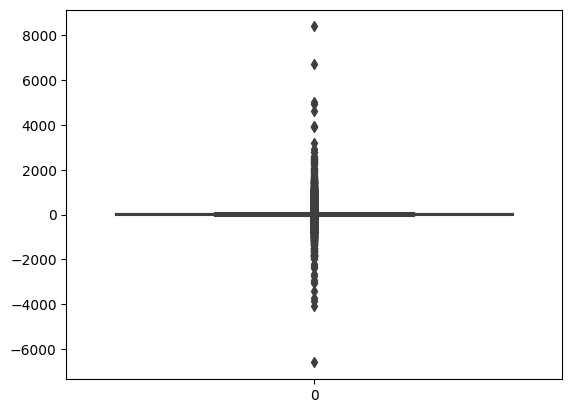

In [13]:
sns.boxplot(df["Profit"])

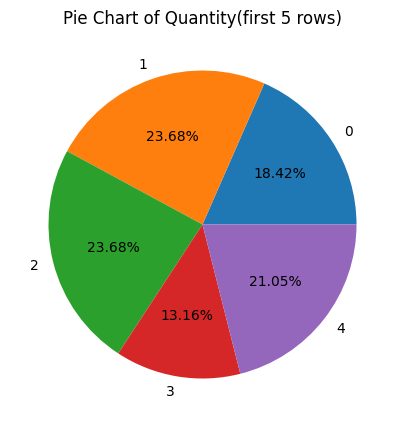

In [14]:
plt.figure(figsize=(10,5))
plt.pie(df["Quantity"][:5],labels=df.index[:5],autopct="%1.2f%%")
plt.title("Pie Chart of Quantity(first 5 rows)")
plt.show()

In [15]:
df1=df[["Sales","Profit","Shipping Cost"]]
df1.corr()

,Sales,Profit,Shipping Cost
Sales,1.000000,0.484918,0.768073
Profit,0.484918,1.000000,0.354441
Shipping Cost,0.768073,0.354441,1.000000


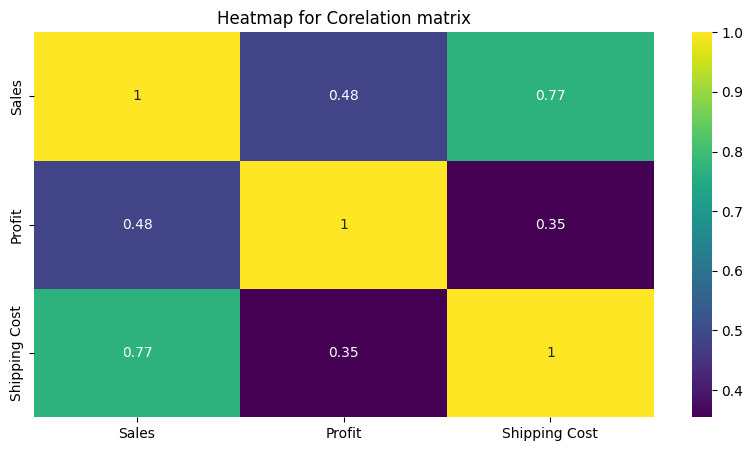

In [16]:
plt.figure(figsize=(10,5))
df1=df[["Sales","Profit","Shipping Cost"]]
sns.heatmap(df1.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for Corelation matrix")
plt.show()

In [17]:
df1.head()

,Sales,Profit,Shipping Cost
0,2309.650,762.1845,933.57
1,3709.395,-288.7650,923.63
2,5175.171,919.9710,915.49
3,2892.510,-96.5400,910.16
4,2832.960,311.5200,903.04


<Figure size 500x1000 with 0 Axes>

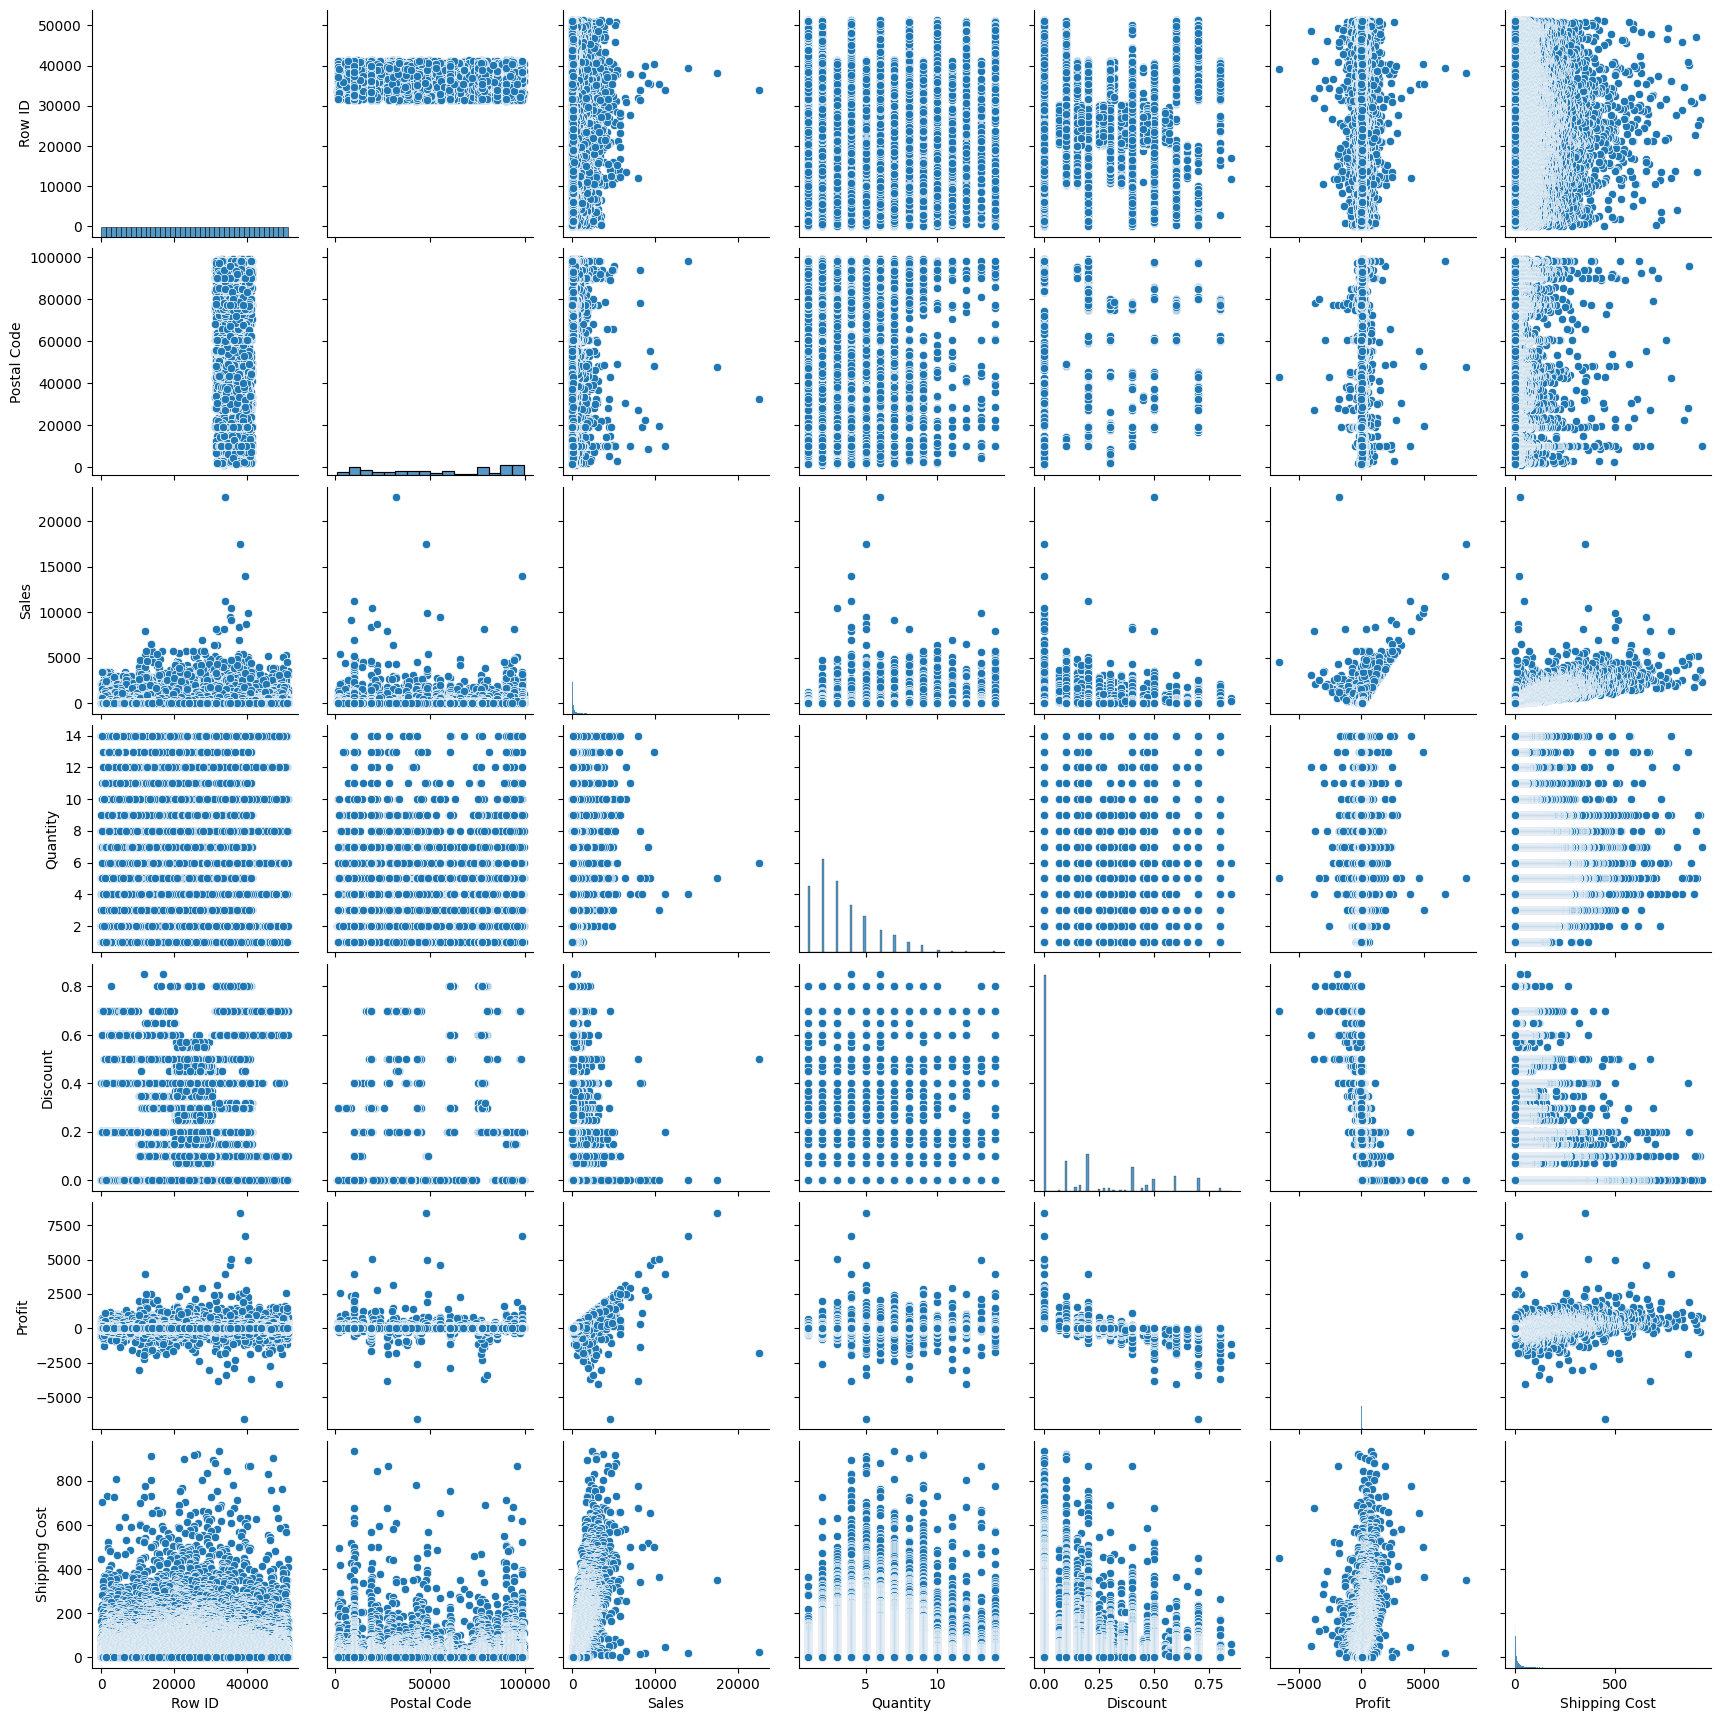

In [18]:
plt.figure(figsize=(5,10))
sns.pairplot(df)
plt.show()

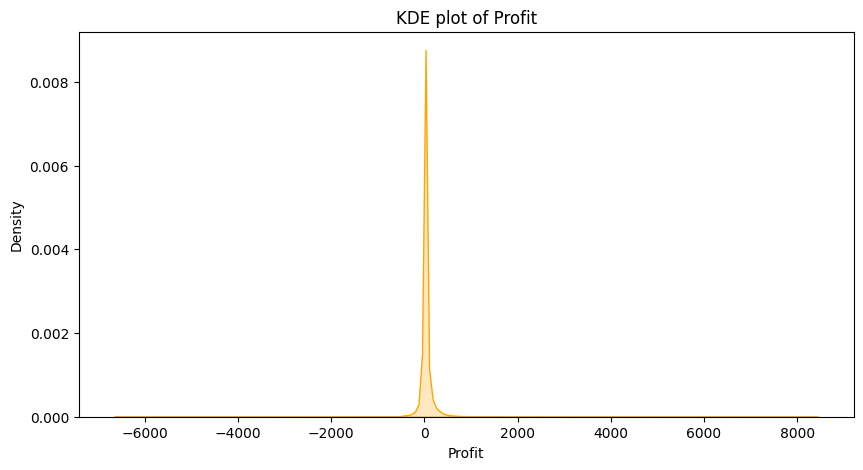

In [19]:
#KDE plot
plt.figure(figsize=(10,5))
sns.kdeplot(df["Profit"],shade=True,color="Orange")
plt.title("KDE plot of Profit")
plt.xlabel("Profit")
plt.show()

<Axes: xlabel='Profit', ylabel='Count'>

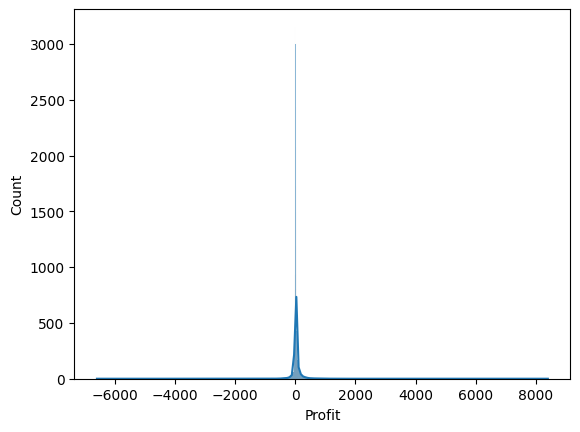

In [20]:
sns.histplot(df["Profit"],kde=True)

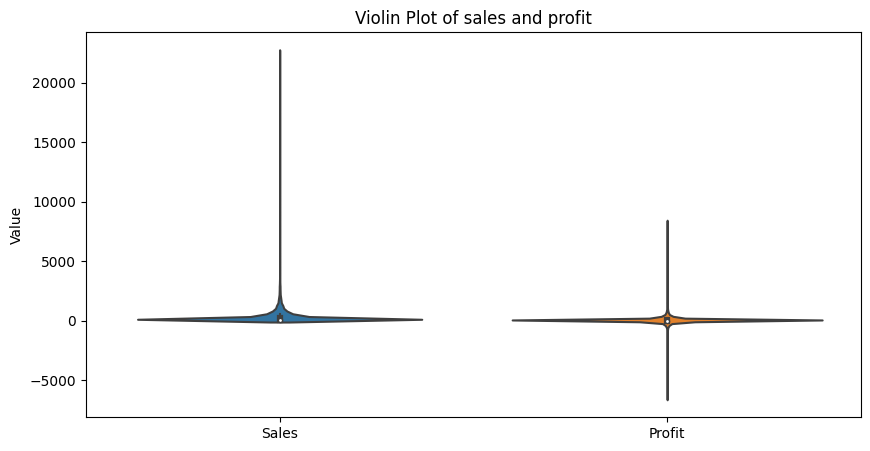

In [21]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df[["Sales","Profit"]])
plt.title("Violin Plot of sales and profit")
plt.ylabel("Value")
plt.show()

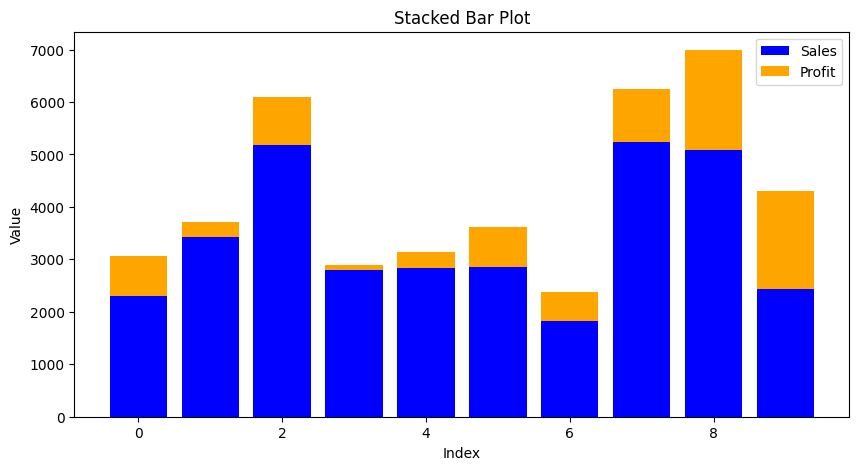

In [22]:
plt.figure(figsize=(10, 5))
x = df.index[:10]
plt.bar(x, df['Sales'][:10], label='Sales', color='blue')
plt.bar(x, df['Profit'][:10], bottom=df['Sales'][:10], label='Profit', color='orange')
plt.title('Stacked Bar Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


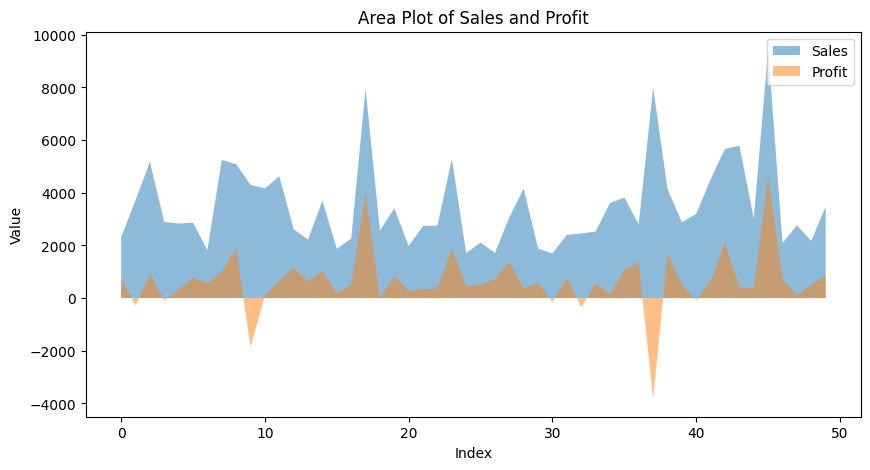

In [23]:
plt.figure(figsize=(10, 5))
plt.fill_between(df.index[:50], df['Sales'][:50], alpha=0.5, label='Sales')
plt.fill_between(df.index[:50], df['Profit'][:50], alpha=0.5, label='Profit')
plt.title('Area Plot of Sales and Profit')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

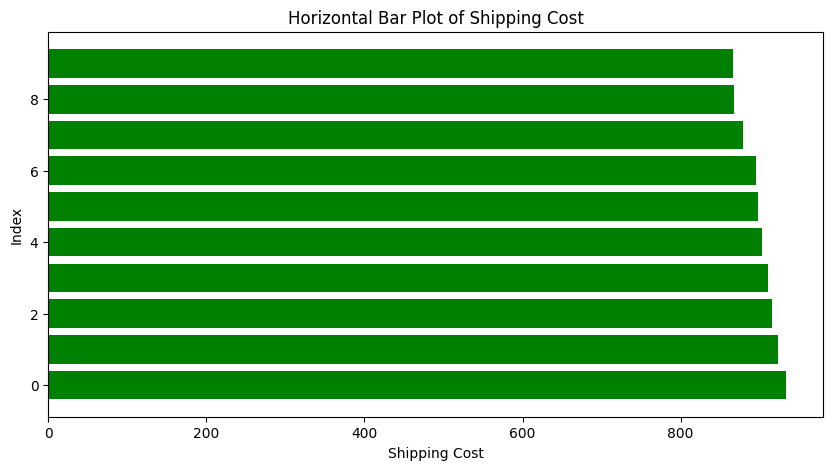

In [24]:
plt.figure(figsize=(10, 5))
plt.barh(df.index[:10], df['Shipping Cost'][:10], color='green')
plt.title('Horizontal Bar Plot of Shipping Cost')
plt.xlabel('Shipping Cost')
plt.ylabel('Index')
plt.show()

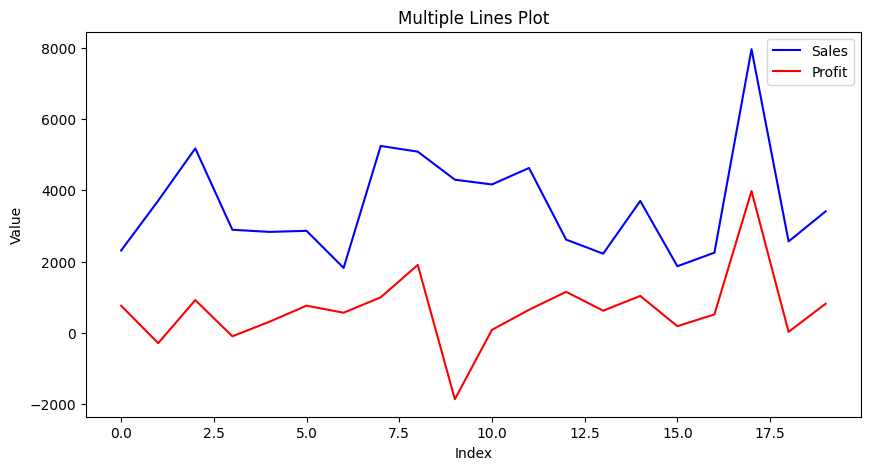

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df['Sales'][:20], label='Sales', color='blue')
plt.plot(df['Profit'][:20], label='Profit', color='red')
plt.title('Multiple Lines Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

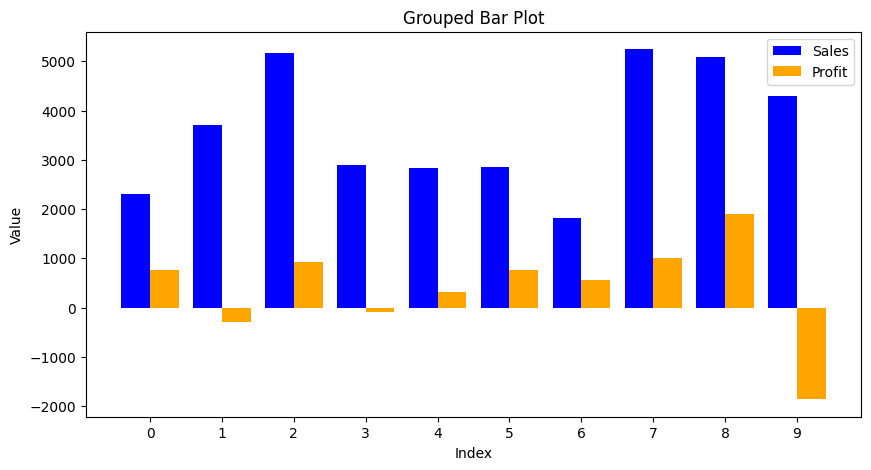

In [26]:
x = np.arange(10)
width = 0.4
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, df['Sales'][:10], width, label='Sales', color='blue')
plt.bar(x + width/2, df['Profit'][:10], width, label='Profit', color='orange')
plt.title('Grouped Bar Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(x, df.index[:10])
plt.legend()
plt.show()

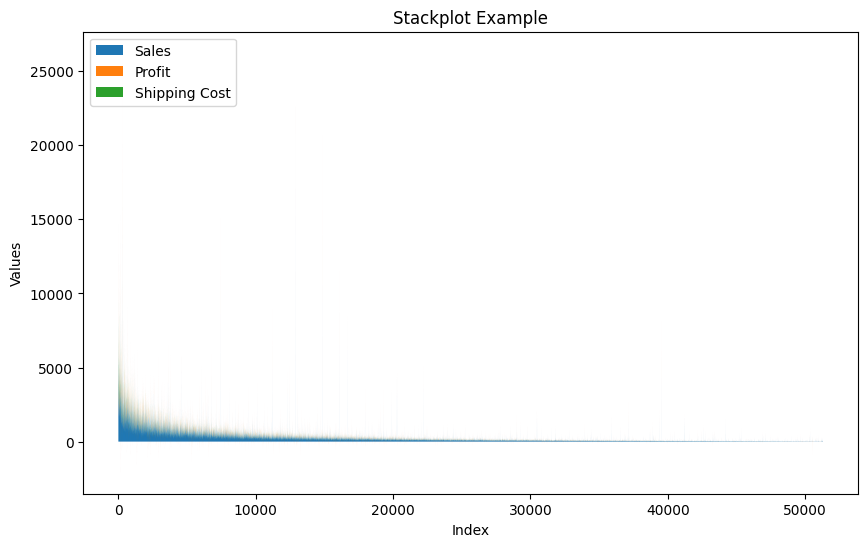

In [27]:
plt.figure(figsize=(10, 6))
plt.stackplot(range(len(df)), df["Sales"], df["Profit"], df["Shipping Cost"], labels=["Sales", "Profit", "Shipping Cost"])
plt.legend(loc='upper left')
plt.title("Stackplot Example")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

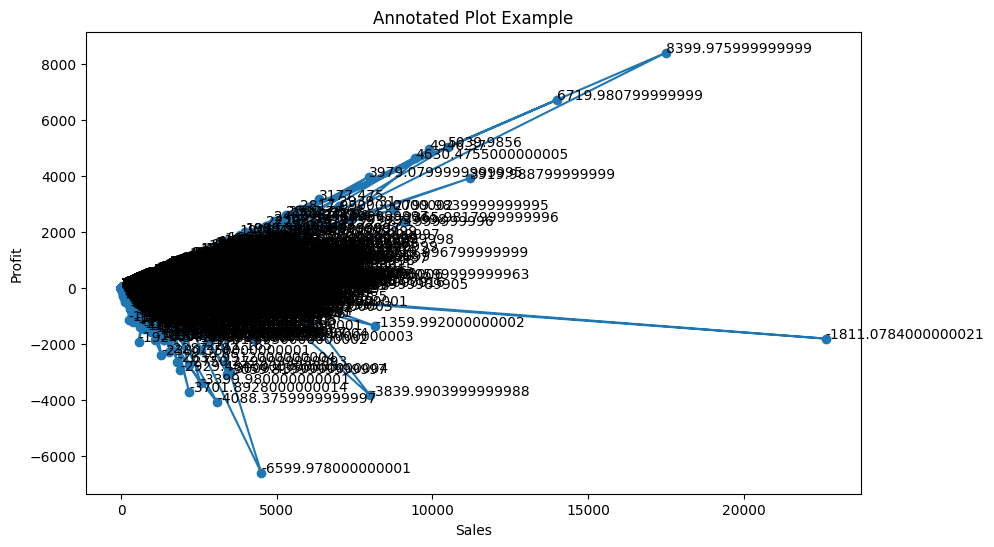

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], df["Profit"], marker='o')
for i, txt in enumerate(df["Profit"]):
    plt.annotate(txt, (df["Sales"][i], df["Profit"][i]))
plt.title("Annotated Plot Example")
plt.xlabel("Sales")
plt.ylabel("Profit")                                                             
plt.show()

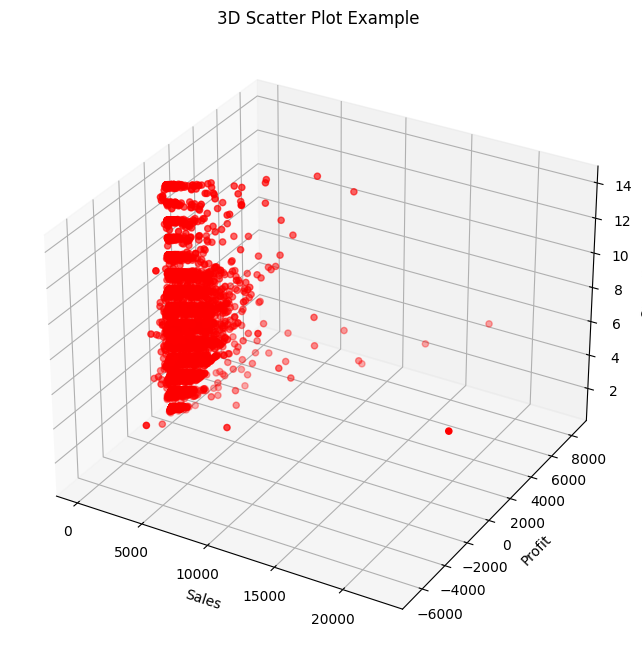

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Sales"], df["Profit"], df["Quantity"], c='r', marker='o')
ax.set_xlabel("Sales")
ax.set_ylabel("Profit")
ax.set_zlabel("Quantity")
plt.title("3D Scatter Plot Example")
plt.show()

**Categorical Visuals@**

In [30]:
df=df.loc[0:1000,:]

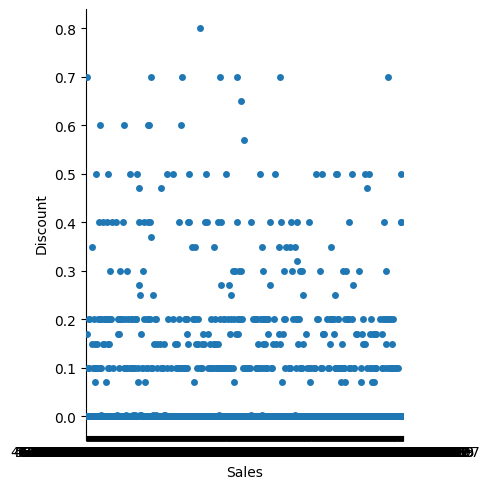

In [31]:
sns.catplot(x='Sales',y='Discount',data=df)

In [ ]:
sns.catplot(x='Sales',y='Discount',col='Category',data=df)

In [ ]:
sns.lineplot(x='Discount',y='Sales',data=df)